In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Dataset Splitting

```
# This is formatted as code
```



In [ ]:
# download digits dataset

digits = load_digits()
digits.data.shape


(1797, 64)

AttributeError: shape

In [ ]:
# Load the digits dataset. Each image is 8x8 pixels.
X = digits.images
y = digits.target


In [ ]:
X.shape

(500, 200)

In [ ]:
# flatten the 8x8 images into a 64-dimensional vector.
n_samples = len(X)
X = X.reshape((n_samples, -1))

In [ ]:
print(n_samples)

1797


In [ ]:
print(X.shape)

(1797, 64)


In [ ]:
print(y[2])

1


In [ ]:
print(X[2])

[0.49453232 0.08096339 0.59091678 0.73232235 0.23801167 0.16965228
 0.63953068 0.39312775 0.42656429 0.47112016 0.51147436 0.19552598
 0.5777379  0.06909695 0.11351066 0.71152841 0.73143447 0.26632084
 0.18469621 0.05399274 0.41888614 0.509045   0.89945923 0.00245996
 0.40586123 0.41928174 0.88655393 0.19603976 0.06618742 0.38161013
 0.61231748 0.85814444 0.26902257 0.25131147 0.32597666 0.11823319
 0.97721525 0.54061777 0.2722232  0.36173713 0.86595613 0.67372447
 0.55320582 0.72480738 0.75582308 0.19421077 0.15867953 0.96669639
 0.18572577 0.4647619  0.98278071 0.4172125  0.51484902 0.7983635
 0.34039345 0.43103384 0.33217333 0.28739677 0.4718181  0.74588536
 0.86728811 0.47011533 0.32100366 0.91159265 0.33592581 0.77500476
 0.74861946 0.04977577 0.17763943 0.57284687 0.86762734 0.59399311
 0.74271008 0.73441189 0.49436637 0.56080235 0.07128156 0.92773236
 0.67434621 0.15449692 0.24400558 0.00465212 0.26400773 0.31662139
 0.68313947 0.47665743 0.84277856 0.08678711 0.70702178 0.87489

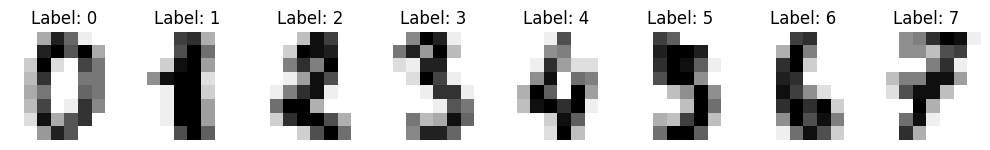

In [ ]:

# Display the first 8 images
fig, axes = plt.subplots(1, 8, figsize=(10, 3))
for i in range(8):
    axes[i].imshow(digits.images[i], cmap=plt.cm.gray_r )
    axes[i].set_title(f'Label: {digits.target[i]}')
    axes[i].axis('off')  # Hide axes
plt.tight_layout()
plt.show()


In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

In [ ]:

X_train, X_val, y_train, y_val = train_test_split(
        X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full
    )

In [ ]:

print("Data Splitting:")
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])
print()

Data Splitting:
Training set size: 1077
Validation set size: 360
Test set size: 360



## KNN Model


In [ ]:

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_full, y_train_full)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
 # Evaluate the model on the validation set.
val_accuracy = knn.score(X_val, y_val)
print("Validation Accuracy:", val_accuracy)

# Evaluate the model on the test set.
test_accuracy = knn.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 0.9972222222222222
Test Accuracy: 0.9833333333333333


In [ ]:
# Print a detailed classification report and confusion matrix for the test set
y_pred = knn.predict(X_test)
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      1.00      0.99        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      0.97      0.98        30
           9       0.97      0.93      0.95        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  

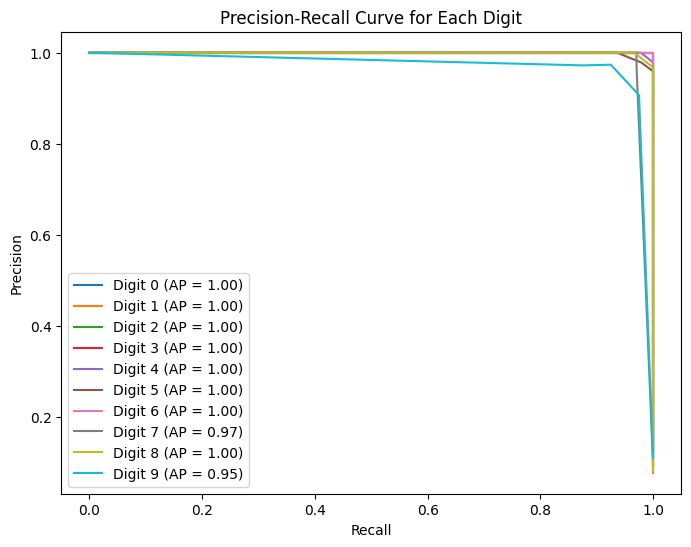

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import seaborn as sns


y_pred_proba = knn.predict_proba(X_test)


# Precision-Recall Curve and Average Precision
precision = dict()
recall = dict()
average_precision = dict()
for i in range(10):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, y_pred_proba[:, i])
    average_precision[i] = average_precision_score(y_test == i, y_pred_proba[:, i])

plt.figure(figsize=(8, 6))
for i in range(10):
    plt.plot(recall[i], precision[i], label=f'Digit {i} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Digit')
plt.legend(loc='lower left')
plt.show()


In [ ]:
# prompt: write code to calculate mse and rmse error

from sklearn.metrics import mean_squared_error

# Assuming y_test contains the true labels and y_pred contains the predicted labels
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 0.3638888888888889
Root Mean Squared Error (RMSE): 0.6032320356951286


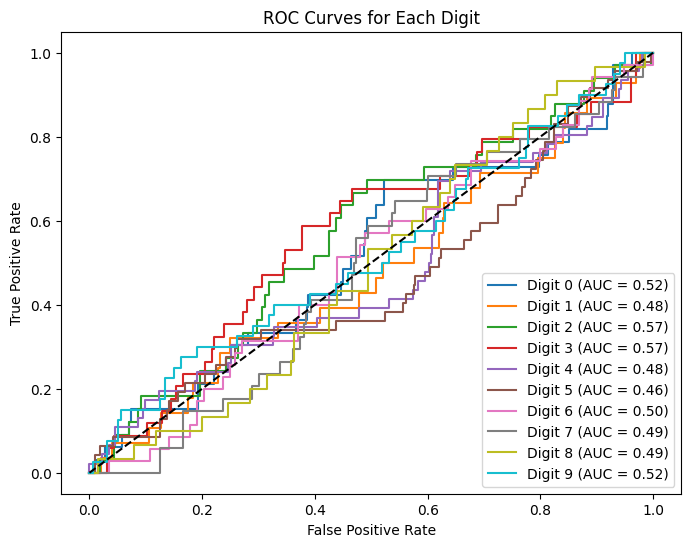

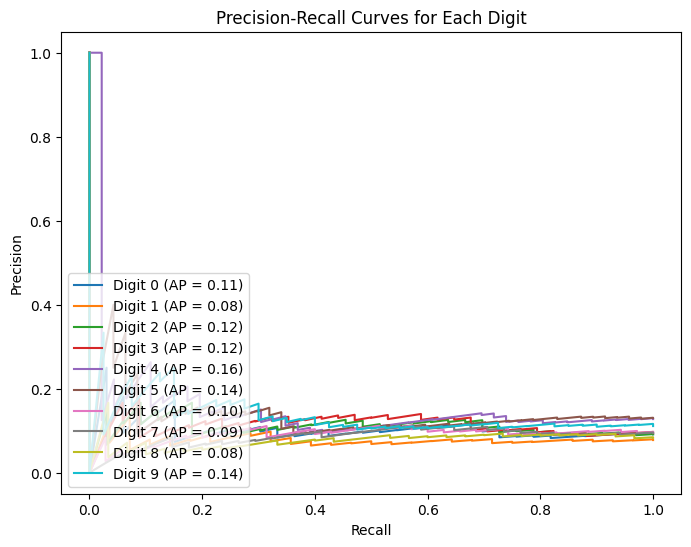

In [ ]:
# prompt: explian all metrics chart with python use above model

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# ... (Your existing code) ...



# Example with dummy probabilities (replace with your actual predictions)
y_pred_proba = np.random.rand(len(y_test), 10)  # Example 10 classes

# ROC Curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):  # Assuming 10 classes (digits 0-9)
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Digit {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Digit')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve and Average Precision
precision = dict()
recall = dict()
average_precision = dict()
for i in range(10):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, y_pred_proba[:, i])
    average_precision[i] = average_precision_score(y_test == i, y_pred_proba[:, i])

plt.figure(figsize=(8, 6))
for i in range(10):
    plt.plot(recall[i], precision[i], label=f'Digit {i} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Each Digit')
plt.legend(loc='lower left')
plt.show()





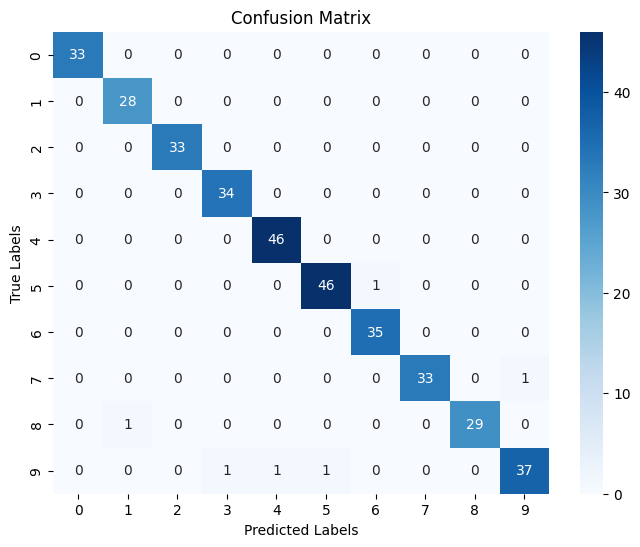

In [ ]:
# prompt: now draw precision and accuracy chart and also confusion metrix

# Assuming y_pred contains your model's predictions on the test set.
# Example confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")  # Use seaborn for better visualization
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


## Cross validation

In [ ]:
# Second split: split the training+validation set into training (75%) and validation (25%).
    # This results in 60% training and 20% validation overall.
X_train, X_val, y_train, y_val = train_test_split(
        X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full
    )

In [ ]:
# Perform 5-fold cross validation on the full training+validation set
knn_cv = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_cv, X_train_full, y_train_full, cv=5)
print("\nCross Validation:")
print("5-Fold CV Scores:", cv_scores)



Cross Validation:
5-Fold CV Scores: [0.99652778 0.97569444 0.97212544 0.99651568 0.9825784 ]


In [ ]:
train 1 2 3 4  test 5
train 1 2 3 5 test 4
train 1 2 4 5 test 3
train 1 3 4 5 test 2
train 2 3 4 5 test 1

In [ ]:
from sklearn.model_selection import KFold

In [ ]:

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []
rmse_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train_full, y_train_full)):
    X_train, X_val = X_train_full[train_index], X_train_full[val_index]
    y_train, y_val = y_train_full[train_index], y_train_full[val_index]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)

    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)

    mse_scores.append(mse)
    rmse_scores.append(rmse)
    print(f"Fold {fold + 1}: MSE = {mse:.4f}, RMSE = {rmse:.4f}")

print(f"\nAverage MSE across folds: {np.mean(mse_scores):.4f}")
print(f"Average RMSE across folds: {np.mean(rmse_scores):.4f}")


Fold 1: MSE = 0.1806, RMSE = 0.4249
Fold 2: MSE = 0.4618, RMSE = 0.6796
Fold 3: MSE = 0.6132, RMSE = 0.7831
Fold 4: MSE = 0.1429, RMSE = 0.3780
Fold 5: MSE = 0.2230, RMSE = 0.4722

Average MSE across folds: 0.3243
Average RMSE across folds: 0.5476


In [ ]:
# Flatten images for this step
X_all = digits.images.reshape((n_samples, -1))
knn_full = KNeighborsClassifier(n_neighbors=3)
knn_full.fit(X_all, y)
predicted = knn_full.predict(X_all)

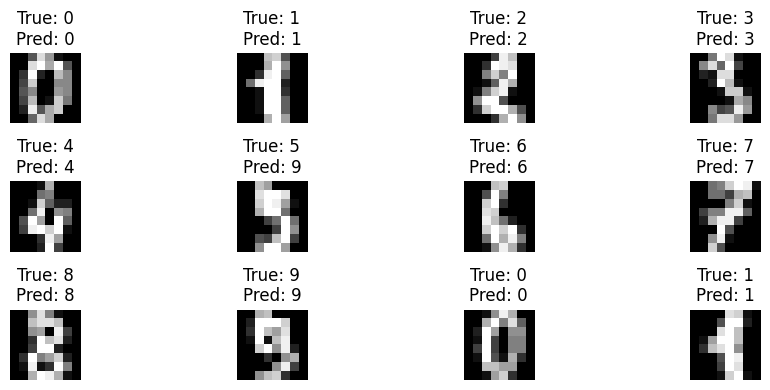

In [ ]:

# Plot the first 12 images with true and predicted labels.
plt.figure(figsize=(10, 4))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"True: {y[i]}\nPred: {predicted[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

##Explain AUC and ROC curve


In [ ]:
# Ensure plots display inline
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

# -----------------------------------------------------------------------------
# 1. Generate a Binary Classification Dataset
# -----------------------------------------------------------------------------
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------------------------------------------------------
# 2. Train KNN Models for Two Scenarios: Overfitting (k=1) & Balanced (k=10)
# -----------------------------------------------------------------------------

# Balanced Model (k=10)
knn_balanced = KNeighborsClassifier(n_neighbors=10)
knn_balanced.fit(X_train, y_train)
y_probs_balanced = knn_balanced.predict_proba(X_test)[:, 1]  # Get probabilities for class 1

# -----------------------------------------------------------------------------
# 3. Compute ROC Curves and AUC Scores
# -----------------------------------------------------------------------------


fpr_balanced, tpr_balanced, _ = roc_curve(y_test, y_probs_balanced)
auc_balanced = auc(fpr_balanced, tpr_balanced)



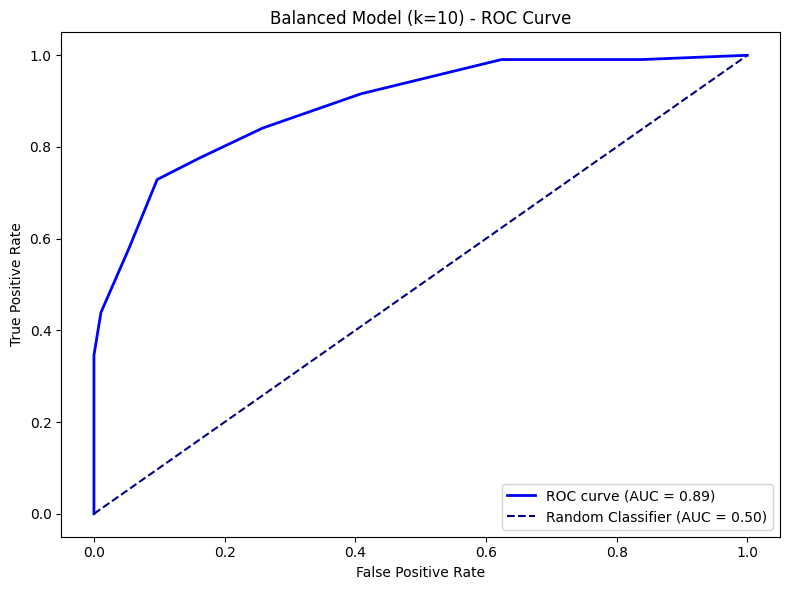

In [ ]:

fig, axes = plt.subplots(1, 1, figsize=(8, 6)) # create a single subplot

axes.plot(fpr_balanced, tpr_balanced, color='blue', lw=2, label=f'ROC curve (AUC = {auc_balanced:.2f})')
axes.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Classifier (AUC = 0.50)')
axes.set_title("Balanced Model (k=10) - ROC Curve")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend(loc="lower right")
plt.tight_layout()
plt.show()
